In [3]:
import numpy as np
import matplotlib.pyplot as plt

from AvantgardeModelUtils import *

file_uniform = "../data/control/agent_data_uni.csv"
data = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal"])

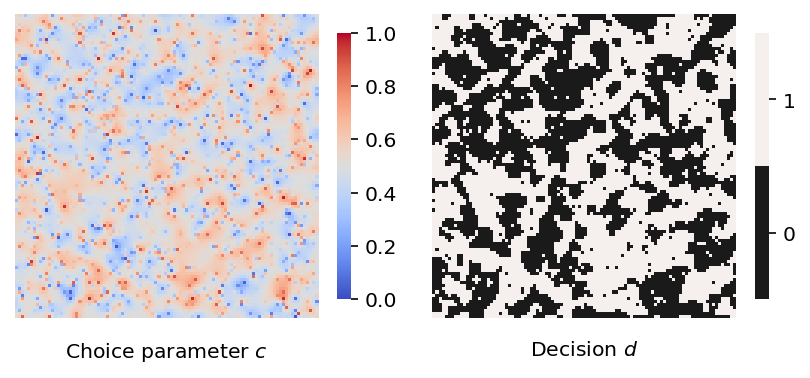

In [5]:
ShowState(Grid(Choice(data, 2000)))

In [28]:
attitudes = np.genfromtxt('../data/control/agent_details_select_uni.csv', delimiter=' ')
steps = np.arange(7500, attitudes.shape[0] + 7500)

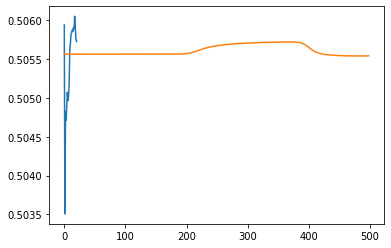

In [29]:
plt.figure()

plt.plot(data.groupby("step").mean().get("affinity").values)
plt.plot(attitudes.mean(axis=1))

plt.show()

In [21]:
data.groupby("step").mean().get("affinity").values

array([0.50594137, 0.5035058 , 0.50481953, 0.5047122 , 0.50488308,
       0.50507511, 0.50496567, 0.50501703, 0.50519842, 0.50562987,
       0.50570128, 0.50582256, 0.50584058, 0.50587436, 0.50585709,
       0.50590859, 0.50589163, 0.50605332, 0.50590211, 0.50576181,
       0.50572804])

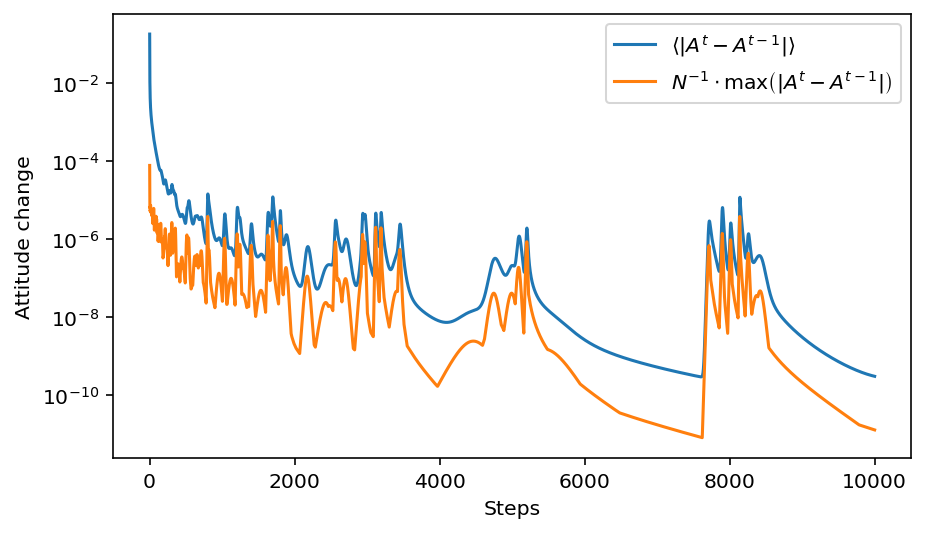

In [93]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.dpi": 147})

# Read in data from text file
data = np.genfromtxt('../data/affinity_change_seed100.txt', delimiter=' ')
data2 = np.genfromtxt('../data/control/affinity100.txt', delimiter=' ')

plt.figure(figsize=(7,4))

start = 0
step = 1
end = 10000
n_agents = 10000

# Plot data with error bars
#plt.plot(data[start:end:step, 0], data[start:end:step, 1] / n_agents)

plt.plot(data2[start:end:step, 0], data2[start:end:step, 1] / n_agents, 
         label=r'$\langle \| A^{t} - A^{t-1} \| \rangle$')
plt.plot(data2[start:end:step, 0], data2[start:end:step, 3] / (n_agents), 
        label=r'$N^{-1} \cdot \max \left( \| A^{t} - A^{t-1} \| \right)$')
#plt.plot(data2[start:end:step, 0], data2[start:end:step, 4])

plt.gca().set_yscale("log")
# Add axis labels and title
plt.xlabel('Steps')
plt.ylabel("Attitude change")
plt.legend()

#plt.ylim([-1e-5, 1e-4])

# Show plot
plt.show()


In [89]:
attitudes = np.genfromtxt('../data/affinity100.txt', delimiter=' ')
steps = attitudes[:, 0]
attitudes = attitudes[:, 1:]

In [55]:
data.shape

(10000, 3)

In [54]:
data2.shape

(10, 5)

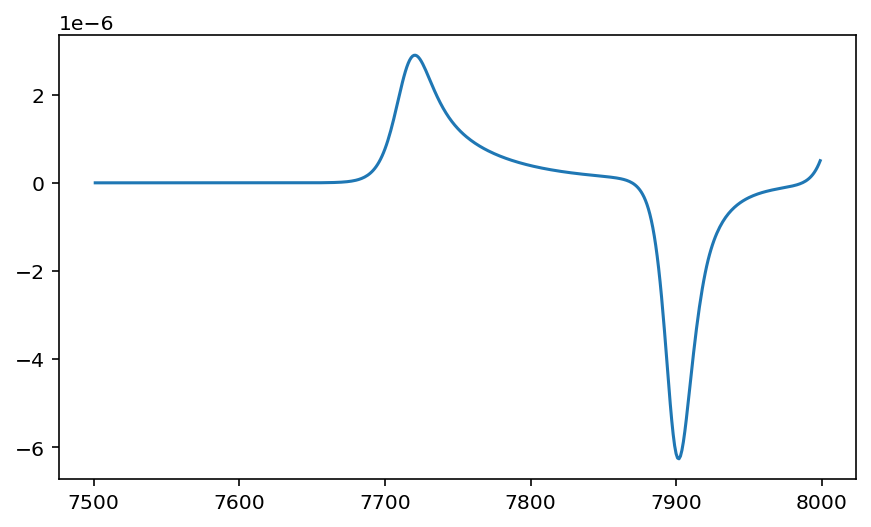

In [49]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.dpi": 147})

# Read in data from text file
data = np.genfromtxt('../data/affinity_change_micro_seed100.txt', delimiter=' ')

steps = data[:, 0]
data = data[:, 1:]

plt.figure(figsize=(7,4))

n_agents = 10000

# Plot data with error bars
#plt.errorbar(data[start:end:step, 0], data[start:end:step, 1] / n_agents, 
#             fmt='-')

plt.plot(steps, attitudes.mean(axis=1))

# Add axis labels and title
#plt.xlabel('Steps')
#plt.ylabel(r'$\langle \| A^{t} - A^{t-1} \| \rangle$')

#plt.ylim([-1e-7, 1e-5])

# Show plot
plt.show()


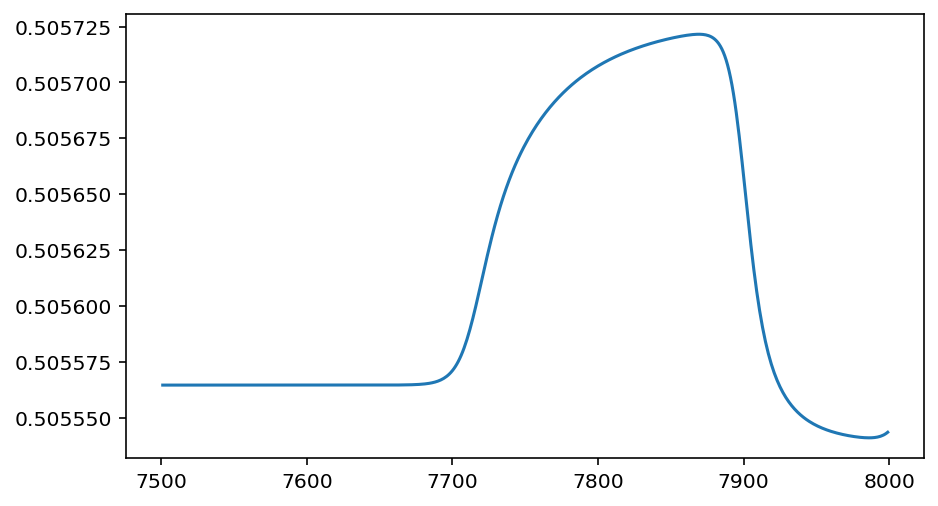

In [88]:
plt.figure(figsize=(7,4))

n_agents = 10000

# Plot data with error bars
#plt.errorbar(data[start:end:step, 0], data[start:end:step, 1] / n_agents, 
#             fmt='-')

plt.plot(steps, attitudes.mean(axis=1))

# Add axis labels and title
#plt.xlabel('Steps')
#plt.ylabel(r'$\langle \| A^{t} - A^{t-1} \| \rangle$')

#plt.ylim([-1e-7, 1e-5])

# Show plot
plt.show()


<AxesSubplot:>

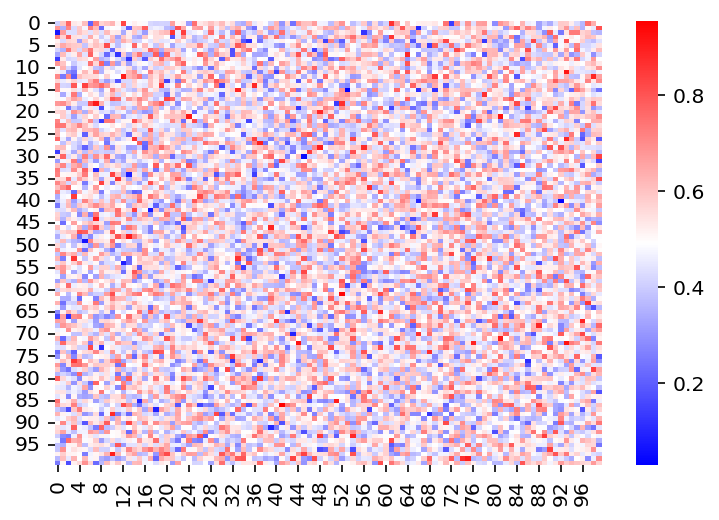

In [98]:
da_grid = attitudes[0].reshape(100, 100)

import seaborn as sns

sns.heatmap(da_grid, cmap="bwr")

In [75]:
rel_att = attitudes - attitudes[0]

In [32]:
import ipywidgets as widgets
from IPython.display import display

# Create a slider widget with a range of [0, max_steps]
slider = widgets.IntSlider(min=0, max=450, value=10)
#display(slider)

data_min = np.min(data)
data_max = np.max(data)

# Define a function that will update the plot based on the slider value
def update_plot(step):
    da_grid = (attitudes[step] - attitudes[0]).reshape(100, 100)
    sns.heatmap(da_grid, cmap="bwr")#, vmin=data_min, vmax=data_max)

# Use the interact() function to link the slider value to the update_plot function
widgets.interact(update_plot, step=slider)

interactive(children=(IntSlider(value=10, description='step', max=450), Output()), _dom_classes=('widget-inter…

<function __main__.update_plot(step)>

In [33]:
import pandas as pd

data = pd.read_csv('../data/affinity_change_micro_seed100.txt', delimiter=' ', header=None)

In [2]:
## Legacy

file = "../data/avantgardeGoal/100k/data_improved_avantgarde-uniform_affinity-uniform_goal-uniform_100.csv"
file = "../data/conviction/data_longrun_avantgarde-uniform_affinity-uniform_goal-uniform_tau-1_100.csv"
#file = "../data/conviction/tautest/data_avantgarde-uniform_affinity-uniform_goal-uniform_tau-1_100.csv"
dtest = load_data(file)

sns.set_style("ticks")

#dtestTransformed = dtest.query("step > 0")
dtest['dA'] = dtest['affinity'].diff(periods=10000).abs()
grouped = dtest.query("step > 0").groupby('step')

plt.figure(figsize=(10, 4))

plt.plot(range(-10, 210), np.zeros(220), "--", color="black", linewidth=0.7)

plt.errorbar(grouped.groups.keys(), grouped.mean().get('dA'), yerr=grouped.max().get('dA'),
            capsize=1.5, elinewidth=0.5, ms=2, marker='o', linestyle='None')
sns.scatterplot(x=dtest.query("step>10")["step"], y=dtest.query("step>10")["dA"], s=3)
plt.xlabel('step')
plt.ylabel(r'$| dA |$')
plt.ylim([-1, 2])
#plt.xlim([0, 2000])
plt.show()

NameError: name 'load_data' is not defined